In [1]:
# References:
#     Applied AI EDA for Iris DataSet
#     https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673

Objective:
    
    To study the linear relationship between the variables and the outcome (whether the given patient 
    survived or not).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load data into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [3]:
# Printing the shape of data to know its size.
haberman.shape # 306 rows and 4 columns

(306, 4)

In [4]:
haberman.columns # Columns present in the dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
# Renaming Columns to make it more readable.
haberman.columns = ['Age_Of_Patient', 'Year_of_Operation', 'Nodes', 'Final_Status']

In [6]:
# Printing out the first 10 rows to realize what is given in the data.
haberman.head(10)

,Age_Of_Patient,Year_of_Operation,Nodes,Final_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
# There are 2 outcomes in this dataset: 1 for survived and 2 for not survived.
# This is somewhat of an imbalanced dataset since the number of patients that survived is far more than the number
# of patients that did not.
haberman['Final_Status'].value_counts()

1    225
2     81
Name: Final_Status, dtype: int64

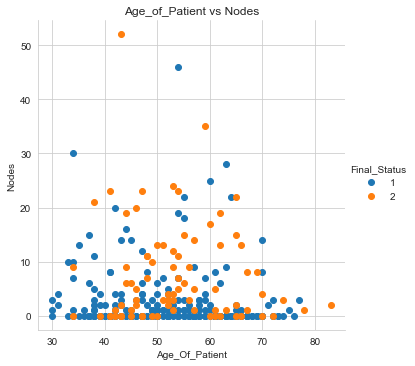

In [8]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Final_Status", height=5).map(plt.scatter, "Age_Of_Patient", "Nodes").add_legend();
plt.title('Age_of_Patient vs Nodes')

plt.show();

# Notice that the blue points cannot be easily seperated from the yellow points 
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

Observation(s):

    Using age and nodes features, we cannot distinguish whether the given patient survived or not.

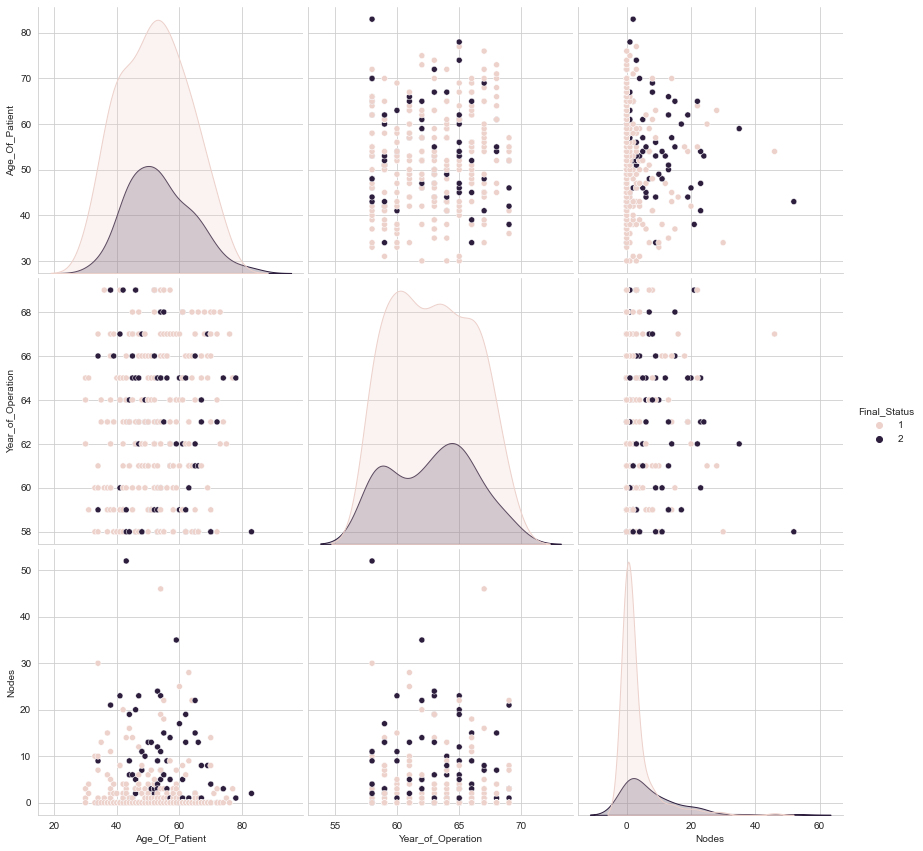

In [9]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Final_Status", height=4);
plt.show()
# NOTE: the diagonal elements are PDFs for each feature. PDFs are expalined below.

Observations

    There is no linear relationship among the given variables.
    We cannot find "lines" and "if-else" conditions to build a simple model to classify the fate of the patient.
    The diagnal plots are histogram of features in pair plot.
    Plot 2:- Year_of_Operation vs Age_of_Patient : Data is completely overlapped and there is no way that we can use
    just these 2 features to linearly separate the outcome class.
    Plot 3 :-Nodes vs Age_Of_Patient: This graph does show us some difference among features (There is no complete 
    overlapping).
    Plot 4:- Rotated version of plot 2.
    Plot 6:- Year_of_Operation vs Nodes: Too much overlapping
    Plot 7:- Rotated version of plot 3.
    Plot 8:- Rotated version of plot 6.

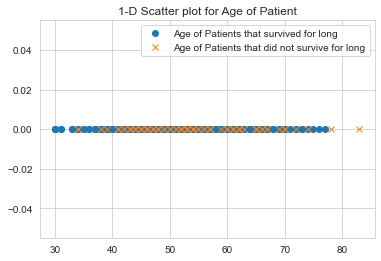

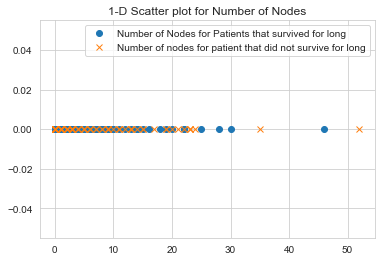

In [24]:
# Creating a 1-d scatterplot for age
survived = haberman.loc[haberman['Final_Status'] == 1]
not_survived = haberman.loc[haberman['Final_Status'] == 2]
plt.plot(survived["Age_Of_Patient"], np.zeros_like(survived["Age_Of_Patient"]), 'o')
plt.plot(not_survived["Age_Of_Patient"], np.zeros_like(not_survived["Age_Of_Patient"]), 'x')
plt.title('1-D Scatter plot for Age of Patient')
plt.legend(['Age of Patients that survived for long',
            'Age of Patients that did not survive for long'])
plt.show()

# Creating a 1-d scatterplot for nodes
plt.plot(survived["Nodes"], np.zeros_like(survived["Nodes"]), 'o')
plt.plot(not_survived["Nodes"], np.zeros_like(not_survived["Nodes"]), 'x')
plt.legend(['Number of Nodes for Patients that survived for long',
            'Number of nodes for patient that did not survive for long'])

plt.title('1-D Scatter plot for Number of Nodes')

plt.show()

Observation:
    
    1-D Scatterplot for Age_of_Patient and Nodes does not help at all since they are overlapped with both the classes.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


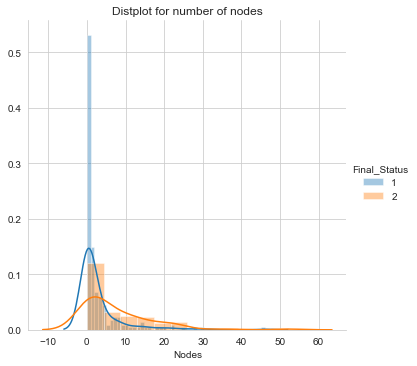

In [27]:
sns.FacetGrid(haberman, hue="Final_Status", height = 5).map(sns.distplot, "Nodes").add_legend()
plt.title('Distplot for number of nodes')
plt.show()

Observation:

    Higher number of nodes increases the likely hood of patient not surviving and vice versa. 
    This helps us a bit in our analysis.
    We can create a simple program based on this graph:
        if nodes == 0:
            Patient = Survives
        elif 0 < nodes < 3:
            Patient = Survival chances high
        else:
            Patient = not survives for long
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


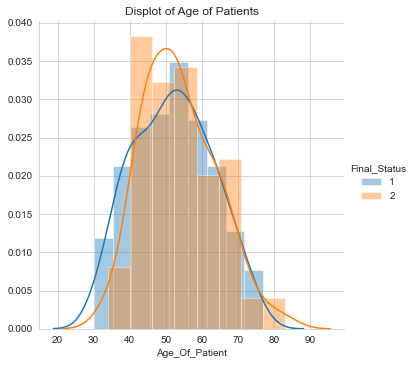

In [28]:
sns.FacetGrid(haberman, hue="Final_Status", height = 5).map(sns.distplot, "Age_Of_Patient").add_legend()
plt.title('Displot of Age of Patients')
plt.show()

Observation:
    
    Age is not a good indicator of whether the patient will survive the cancer for long since the patients 
    who survived for long and those who did not mostly fall in the same age range.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


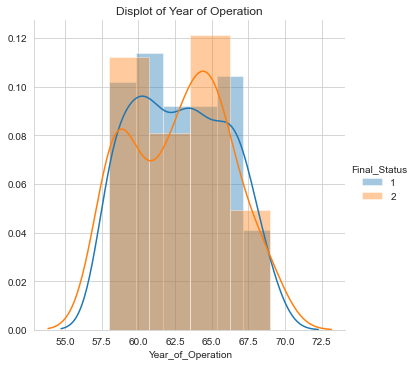

In [29]:
sns.FacetGrid(haberman, hue="Final_Status", height = 5).map(sns.distplot, "Year_of_Operation").add_legend()
plt.title('Displot of Year of Operation')
plt.show()

Observation:
    
    Year is not a good indicator of whether the patient will survive the cancer for long. The data is
    completely overlapped for both the classes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


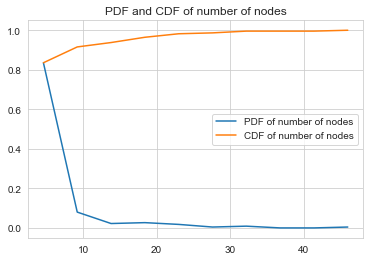

In [14]:
counts, bin_edges = np.histogram(survived['Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF of number of nodes')
plt.legend(['PDF of number of nodes','CDF of number of nodes'])

plt.show();

Observation:
    The orange line shows there is 85% chance of long survival if number of nodes detected are < 5.

In [15]:
#Mean, Variance, Std-deviation,  
print("Means:")
print (np.mean(survived["Nodes"]))
print (np.mean(not_survived["Nodes"]))

print("\nStandard Deviation:")
print(np.std(survived["Nodes"]))
print(np.std(not_survived["Nodes"]))

Means:
2.7911111111111113
7.45679012345679

Standard Deviation:
5.857258449412131
9.128776076761632


Observation:
        
    The average number of nodes that the patient who did not survive for long is much higher than 
    those who survived for long.
    
    The spread for the patients that did not survive also is greater than the spread of the number of nodes of the 
    patients that did survive for long.

In [16]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
#Median with an outlier
print(np.median(not_survived["Nodes"]))
print(np.median(survived["Nodes"]))

print("\nQuantiles:")
print(np.percentile(not_survived["Nodes"],np.arange(0, 100, 25)))
print(np.percentile(survived["Nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(not_survived["Nodes"],90))
print(np.percentile(survived["Nodes"],90))


Medians:
4.0
0.0

Quantiles:
[ 0.  1.  4. 11.]
[0. 0. 0. 3.]

90th Percentiles:
20.0
8.0


Observation:
    
    Average number of nodes in the patients that survived for long is 0 while for short survival 
    patients, it is 4. In other words , Patients who have an average of 4 
    auxillary nodes have short survival status.
    
    Nearly 50% of patients have 0 nodes and 75% of patients have nodes less than 0 for patients that survived
    for long.
    
    Nearly 75% of patients that did not survive for long have at max 4 nodes.
    
    90% of patients have <= 90 nodes that did not survive for long.
    
    90% of patients have <= 20 nodes that did survive for long.

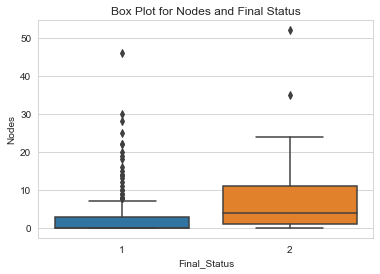

In [17]:
# Drawing a box plot.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Final_Status',y='Nodes', data=haberman)
plt.title('Box Plot for Nodes and Final Status')

plt.show()

Observation:
    
    25th percentile and 50th percentile are nearly same for patients that survived for long.

    There is a significant gap between 75th percentile and 50th percentile for the patients that did not survive.a
    
    The 50th percentile of patients who did not survive for long is similar to the 75th percentile of the patients
    who survived for long.

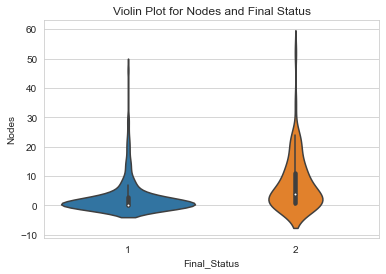

In [18]:
# Plotting Violing Plot
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x="Final_Status", y="Nodes", data=haberman, size=8)
plt.title('Violin Plot for Nodes and Final Status')

plt.show()

Observation:

    The density is more near zero nodes for the patients that survived for long.
    The patients who did not survive for long have their density a bit more spread.

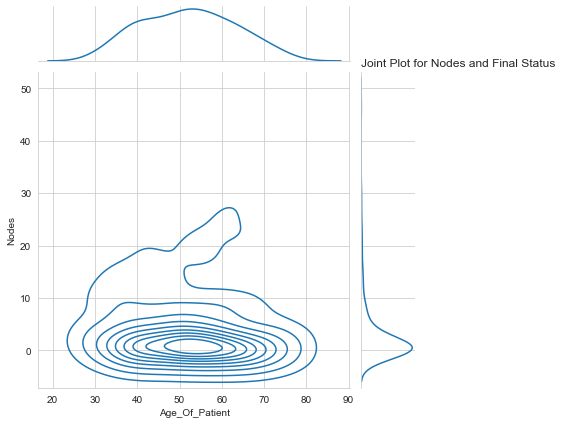

In [19]:
#2D Density plot, contors-plot
sns.jointplot(x="Age_Of_Patient", y="Nodes", data=survived, kind="kde")
plt.title('Joint Plot for Nodes and Final Status', loc = 'left')
plt.show()

Observation:
    Density of point for patients that survive for long is maximum at atound 0 nodes and age being >40 and <60.

Conclusion:

    Yes, you can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and 
    using various Python libraries.